In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as statistics

In [2]:
df = pd.read_csv("csv_result-synthetic_control.csv")
df

,nan,nan.1,0,1,2,3,4,5,6,7,...,51,52,53,54,55,56,57,58,59,label
0,1,1,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,...,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717,Normal
1,2,2,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,...,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910,Normal
2,3,3,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,...,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430,Normal
3,4,4,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,...,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069,Normal
4,5,5,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,...,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,596,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,...,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289,Downward_shift
596,597,597,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,...,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201,Downward_shift
597,598,598,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,...,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747,Downward_shift
598,599,599,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,...,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599,Downward_shift


In [3]:

ccdf = df.drop(['nan','nan.1'], axis=1)

In [4]:
ccdf

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717,Normal
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910,Normal
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430,Normal
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069,Normal
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289,Downward_shift
596,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,27.5580,30.6863,...,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201,Downward_shift
597,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,34.2124,32.5874,...,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747,Downward_shift
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,35.8586,25.3866,...,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599,Downward_shift


In [5]:
shuffled = ccdf.sample(frac = 1)

In [6]:
shuffled


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
495,30.2031,29.8458,25.3980,26.6242,31.0183,24.3055,35.2505,29.4249,33.7658,30.9570,...,36.386800,39.2724,40.93330,38.15310,42.69930,38.01650,38.49390,43.90410,42.581000,Upward_shift
84,31.9661,28.8914,28.4882,25.1075,35.1234,29.0926,30.5725,36.0110,31.7226,33.9285,...,29.232900,25.7010,26.22170,30.97570,27.37000,31.71270,27.80730,25.00580,32.398300,Normal
536,33.2969,34.0637,32.5900,29.2138,24.5372,35.1256,30.9059,35.6115,31.8838,34.2682,...,25.906100,21.7418,15.61220,18.72100,21.99810,19.92040,16.61060,20.02760,20.424200,Downward_shift
17,35.4815,26.8952,34.7511,36.0264,26.2202,30.3771,24.7539,29.3497,33.5999,29.1047,...,35.942300,35.0853,35.38450,31.40130,28.15880,30.45940,30.36800,26.54120,31.422200,Normal
108,28.2605,33.4574,43.3897,41.2148,37.1533,33.4367,30.1819,25.1225,18.3349,20.6586,...,19.269200,18.9633,20.62170,26.71590,36.13020,39.64740,38.90160,38.32850,26.839000,Cyclic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,30.7425,37.9754,43.1891,42.7390,39.3712,44.1962,37.6507,28.8875,18.4354,20.9146,...,21.767500,16.6897,20.82940,17.91380,26.80310,26.09500,30.93240,40.20600,48.586900,Cyclic
355,32.2096,33.9926,30.6470,30.9754,33.6320,30.5443,25.3864,22.7955,27.5945,24.6719,...,-0.117786,10.7466,7.47699,6.62886,1.25219,3.90881,3.18627,-1.59294,0.744567,Decreasing_trend
123,33.2194,35.8685,36.9550,47.1315,38.3517,37.7406,25.9408,25.4453,16.7407,23.2634,...,44.949600,34.9163,29.44090,30.06640,15.23310,14.58650,12.52580,24.09050,32.369200,Cyclic
587,34.4533,34.0717,31.2140,34.2102,28.5297,33.8077,28.6978,31.4028,32.5999,32.6076,...,17.038300,12.5976,18.95600,19.14470,19.81670,23.50540,21.21950,14.30480,20.614000,Downward_shift


In [7]:
shlabeldf = shuffled['label']
shlabeldf

495        Upward_shift
84               Normal
536      Downward_shift
17               Normal
108              Cyclic
             ...       
110              Cyclic
355    Decreasing_trend
123              Cyclic
587      Downward_shift
12               Normal
Name: label, Length: 600, dtype: object

In [8]:
shvluesdf  = shuffled.drop('label',axis = 1)

In [9]:
shvluesdf

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
495,30.2031,29.8458,25.3980,26.6242,31.0183,24.3055,35.2505,29.4249,33.7658,30.9570,...,47.07650,36.386800,39.2724,40.93330,38.15310,42.69930,38.01650,38.49390,43.90410,42.581000
84,31.9661,28.8914,28.4882,25.1075,35.1234,29.0926,30.5725,36.0110,31.7226,33.9285,...,24.93640,29.232900,25.7010,26.22170,30.97570,27.37000,31.71270,27.80730,25.00580,32.398300
536,33.2969,34.0637,32.5900,29.2138,24.5372,35.1256,30.9059,35.6115,31.8838,34.2682,...,18.69970,25.906100,21.7418,15.61220,18.72100,21.99810,19.92040,16.61060,20.02760,20.424200
17,35.4815,26.8952,34.7511,36.0264,26.2202,30.3771,24.7539,29.3497,33.5999,29.1047,...,32.14050,35.942300,35.0853,35.38450,31.40130,28.15880,30.45940,30.36800,26.54120,31.422200
108,28.2605,33.4574,43.3897,41.2148,37.1533,33.4367,30.1819,25.1225,18.3349,20.6586,...,21.48830,19.269200,18.9633,20.62170,26.71590,36.13020,39.64740,38.90160,38.32850,26.839000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,30.7425,37.9754,43.1891,42.7390,39.3712,44.1962,37.6507,28.8875,18.4354,20.9146,...,20.48610,21.767500,16.6897,20.82940,17.91380,26.80310,26.09500,30.93240,40.20600,48.586900
355,32.2096,33.9926,30.6470,30.9754,33.6320,30.5443,25.3864,22.7955,27.5945,24.6719,...,8.30608,-0.117786,10.7466,7.47699,6.62886,1.25219,3.90881,3.18627,-1.59294,0.744567
123,33.2194,35.8685,36.9550,47.1315,38.3517,37.7406,25.9408,25.4453,16.7407,23.2634,...,47.98400,44.949600,34.9163,29.44090,30.06640,15.23310,14.58650,12.52580,24.09050,32.369200
587,34.4533,34.0717,31.2140,34.2102,28.5297,33.8077,28.6978,31.4028,32.5999,32.6076,...,18.95780,17.038300,12.5976,18.95600,19.14470,19.81670,23.50540,21.21950,14.30480,20.614000


In [10]:
shtranspose = shvluesdf.transpose()

In [11]:
for column in shtranspose.columns:
    shtranspose[column] = shtranspose[column] /shtranspose[column].abs().max()
  
# view normalized data
display(shtranspose)


,495,84,536,17,108,144,179,476,253,57,...,222,226,380,7,320,110,355,123,587,12
0,0.641575,0.887676,0.935004,0.984875,0.610873,0.743126,0.656614,0.635498,0.577564,0.754696,...,0.456888,0.562951,0.916305,0.859256,1.000000,0.621667,0.947547,0.692302,0.983110,0.950608
1,0.633985,0.802294,0.956537,0.746541,0.723208,0.792943,0.820038,0.512507,0.552573,0.717479,...,0.487818,0.615237,0.830568,0.952755,0.979290,0.767929,1.000000,0.747510,0.972222,0.913081
2,0.539505,0.791097,0.915154,0.964601,0.937902,0.801443,0.873265,0.588930,0.576689,0.797966,...,0.573139,0.559938,0.835904,0.987470,0.756762,0.873359,0.901579,0.770153,0.890678,0.673340
3,0.565552,0.697218,0.820347,1.000000,0.890890,0.791072,1.000000,0.611716,0.500570,0.871944,...,0.621599,0.511126,0.919675,0.968466,0.806702,0.864257,0.911240,0.982234,0.976174,0.747154
4,0.658891,0.975352,0.689025,0.727805,0.803098,0.830225,0.820655,0.462506,0.495294,0.877180,...,0.447467,0.742229,0.744302,0.851477,0.778326,0.796155,0.989392,0.799260,0.814083,0.718386
5,0.516298,0.807881,0.986356,0.843190,0.722760,0.561418,0.949793,0.546662,0.599794,0.839460,...,0.602537,0.687163,0.867871,0.979122,0.921704,0.893725,0.898557,0.786525,0.964688,0.945746
6,0.748792,0.848977,0.867863,0.687104,0.652405,0.560081,0.631038,0.471847,0.509891,0.879384,...,0.596915,0.689811,1.000000,0.996566,0.807250,0.761363,0.746821,0.540614,0.818880,0.857926
7,0.625044,1.000000,1.000000,0.814672,0.543042,0.372535,0.626051,0.607849,0.669758,0.895569,...,0.560087,0.590185,0.707437,0.719132,0.834315,0.584156,0.670602,0.530287,0.896066,0.797840
8,0.717254,0.880914,0.895323,0.932647,0.396323,0.486837,0.546841,0.551689,0.655602,0.857626,...,0.657534,0.626047,0.658173,0.802131,0.880836,0.372796,0.811780,0.348881,0.930224,0.745646
9,0.657589,0.942170,0.962279,0.807871,0.446552,0.389669,0.453778,0.606609,0.501668,0.854503,...,0.524533,0.645700,0.933750,0.894235,0.799524,0.422930,0.725802,0.484816,0.930444,0.697396


In [12]:
shvalues = shtranspose.transpose()

In [13]:
shvalues

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
495,0.641575,0.633985,0.539505,0.565552,0.658891,0.516298,0.748792,0.625044,0.717254,0.657589,...,1.000000,0.772929,0.834225,0.869506,0.810449,0.907019,0.807547,0.817688,0.932612,0.904506
84,0.887676,0.802294,0.791097,0.697218,0.975352,0.807881,0.848977,1.000000,0.880914,0.942170,...,0.692466,0.811777,0.713699,0.728158,0.860173,0.760046,0.880639,0.772189,0.694393,0.899678
536,0.935004,0.956537,0.915154,0.820347,0.689025,0.986356,0.867863,1.000000,0.895323,0.962279,...,0.525103,0.727464,0.610527,0.438403,0.525701,0.617725,0.559381,0.466439,0.562391,0.573528
17,0.984875,0.746541,0.964601,1.000000,0.727805,0.843190,0.687104,0.814672,0.932647,0.807871,...,0.892137,0.997666,0.973877,0.982183,0.871619,0.781616,0.845474,0.842937,0.736715,0.872199
108,0.610873,0.723208,0.937902,0.890890,0.803098,0.722760,0.652405,0.543042,0.396323,0.446552,...,0.464486,0.416519,0.409907,0.445754,0.577485,0.780982,0.857009,0.840888,0.828500,0.580146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.621667,0.767929,0.873359,0.864257,0.796155,0.893725,0.761363,0.584156,0.372796,0.422930,...,0.414265,0.440177,0.337495,0.421207,0.362248,0.542006,0.527687,0.625507,0.813036,0.982512
355,0.947547,1.000000,0.901579,0.911240,0.989392,0.898557,0.746821,0.670602,0.811780,0.725802,...,0.244350,-0.003465,0.316145,0.219959,0.195009,0.036837,0.114990,0.093734,-0.046861,0.021904
123,0.692302,0.747510,0.770153,0.982234,0.799260,0.786525,0.540614,0.530287,0.348881,0.484816,...,1.000000,0.936762,0.727665,0.613557,0.626592,0.317462,0.303987,0.261041,0.502053,0.674583
587,0.983110,0.972222,0.890678,0.976174,0.814083,0.964688,0.818880,0.896066,0.930224,0.930444,...,0.540953,0.486181,0.359467,0.540901,0.546286,0.565461,0.670717,0.605489,0.408181,0.588212


In [14]:
labeldf = ccdf['label']

In [15]:
labeldf

0              Normal
1              Normal
2              Normal
3              Normal
4              Normal
            ...      
595    Downward_shift
596    Downward_shift
597    Downward_shift
598    Downward_shift
599    Downward_shift
Name: label, Length: 600, dtype: object

In [16]:
vluesdf  = ccdf.drop('label',axis = 1)

In [17]:
vluesdf

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,31.4333,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,32.5577,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,33.6318,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,34.6292,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.7218,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,26.7468,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289
596,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,27.5580,30.6863,...,19.1063,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201
597,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,34.2124,32.5874,...,21.8787,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,35.8586,25.3866,...,19.6441,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599


In [18]:
labeldf

0              Normal
1              Normal
2              Normal
3              Normal
4              Normal
            ...      
595    Downward_shift
596    Downward_shift
597    Downward_shift
598    Downward_shift
599    Downward_shift
Name: label, Length: 600, dtype: object

In [19]:
import tensorflow as tf
import sklearn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the categorical data
le.fit(shlabeldf)

# Transform the categorical data into numerical data
encoded_data = le.transform(shlabeldf)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_data = to_categorical(encoded_data,6)

In [24]:
tf.__version__

'2.11.0'

In [25]:
y_data

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [26]:
X = shvalues.values
Y = y_data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=101)

In [28]:
X_train

array([[0.53339937, 0.56317033, 0.44298196, ..., 0.82320205, 0.87422097,
        1.        ],
       [0.69876569, 0.72200539, 0.92603019, ..., 0.95769895, 0.85995532,
        0.78956021],
       [1.        , 0.86797754, 0.68999925, ..., 0.46878517, 0.21707286,
        0.35319186],
       ...,
       [0.96036239, 0.98653827, 0.99215196, ..., 0.73493963, 0.69024136,
        0.89412092],
       [0.75316615, 0.68142244, 0.88828888, ..., 0.45401662, 0.5356311 ,
        0.63546986],
       [0.82235061, 0.96954106, 0.85296365, ..., 0.1717636 , 0.09385192,
        0.28244294]])

In [29]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [30]:
model = Sequential()


# input layer
model.add(Dense(60))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0))




# output layer
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping


In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [33]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/30
17/17 [==============================] - 2s 31ms/step - loss: 1.6870 - accuracy: 0.2185 - val_loss: 1.5355 - val_accuracy: 0.2667
Epoch 2/30
17/17 [==============================] - 0s 5ms/step - loss: 1.4556 - accuracy: 0.3815 - val_loss: 1.3431 - val_accuracy: 0.4833
Epoch 3/30
17/17 [==============================] - 0s 5ms/step - loss: 1.2908 - accuracy: 0.5000 - val_loss: 1.2373 - val_accuracy: 0.5000
Epoch 4/30
17/17 [==============================] - 0s 6ms/step - loss: 1.1525 - accuracy: 0.5444 - val_loss: 1.0719 - val_accuracy: 0.6000
Epoch 5/30
17/17 [==============================] - 0s 6ms/step - loss: 1.0433 - accuracy: 0.5815 - val_loss: 0.9450 - val_accuracy: 0.6500
Epoch 6/30
17/17 [==============================] - 0s 5ms/step - loss: 0.9011 - accuracy: 0.6778 - val_loss: 0.8294 - val_accuracy: 0.7500
Epoch 7/30
17/17 [==============================] - 0s 5ms/step - loss: 0.8346 - accuracy: 0.7019 - val_loss: 0.7771 - val_accuracy: 0.7167
Epoch 8/30
17/17 [=

In [34]:
losses = pd.DataFrame(model.history.history)


<AxesSubplot: >

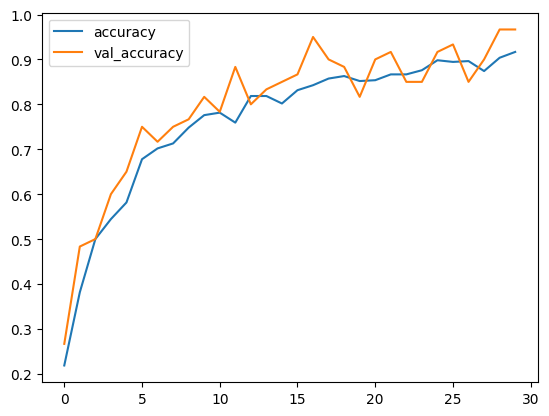

In [35]:
losses[['accuracy','val_accuracy']].plot()

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [50]:
model.save('control_charts.h5')

In [51]:
predictions

array([[1.46689767e-04, 9.40249085e-01, 5.95886111e-02, 1.06858628e-11,
        1.55793223e-05, 7.41966211e-12],
       [1.89394259e-03, 7.55793462e-06, 4.89648410e-05, 5.36579967e-01,
        1.58535421e-01, 3.02934170e-01],
       [4.09722823e-04, 3.64997777e-06, 6.45325053e-05, 7.68146873e-01,
        1.39590457e-01, 9.17847455e-02],
       [6.25365938e-04, 1.46454090e-06, 2.47280641e-05, 7.83167422e-01,
        5.06396964e-02, 1.65541306e-01],
       [1.35124370e-04, 4.24276827e-08, 8.20028347e-08, 1.66706190e-01,
        8.45747592e-04, 8.32312822e-01],
       [2.18909045e-04, 1.30899608e-07, 5.19186472e-07, 4.25501585e-01,
        4.59119864e-03, 5.69687665e-01],
       [8.88809227e-05, 8.07335258e-01, 1.92530751e-01, 2.61597601e-11,
        4.50942789e-05, 7.54473914e-12],
       [9.62786794e-01, 1.99639914e-03, 3.69022670e-03, 4.24485328e-03,
        2.40674764e-02, 3.21435998e-03],
       [2.19933208e-04, 4.14817691e-07, 5.58757756e-06, 7.06697524e-01,
        2.29762383e-02, 

In [52]:
model.predict(X_test[[0]])

1/1 [==============================] - 0s 30ms/step


array([[1.4668980e-04, 9.4024920e-01, 5.9588592e-02, 1.0685864e-11,
        1.5579324e-05, 7.4196630e-12]], dtype=float32)

In [53]:
y_test[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

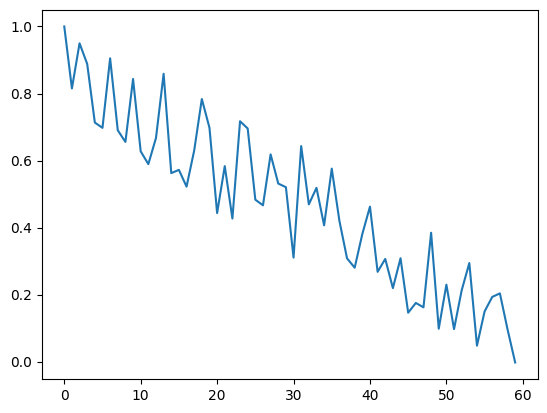

In [54]:
plt.plot(X_test[0])